# Supervised Learning with Scikit learn

## 1. Classification 

### Classification intro

**Supervised learning** has 2 categories: classification and regression.

Classification tasks' target value (a.k.a `y`) is usually discrete values, representing categorical classes (e.g . E.g an email being spam or not, animal classes, etc.).

A simple classifier that separates 2 classes -- 1 or 0, true or false; is called **binary classifier**.

An example of a binary classifier:

In [13]:
# import data from the csv file and turn into panda df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the csv file
churn_df = pd.read_csv('./data/Telecom_Churn_Clean.csv')

# print the first 5 rows of the dataframe
#print(df.head())

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# predict with new data
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 


Predictions: [0 1 0]


### Testing our model

But how can we test our model against new data points? We split the data into 2 sets: **training and testing data**. Testing data is usually 20%-30%.

After this we can test the model's accuracy.

In [14]:
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


To test our model isn't overfitting -- fitting too much the dataset and this being bad at predicting. Or overfitting which is the opposite, we test our model with different `n_neighbors` values to test the model accuracy and complexity.

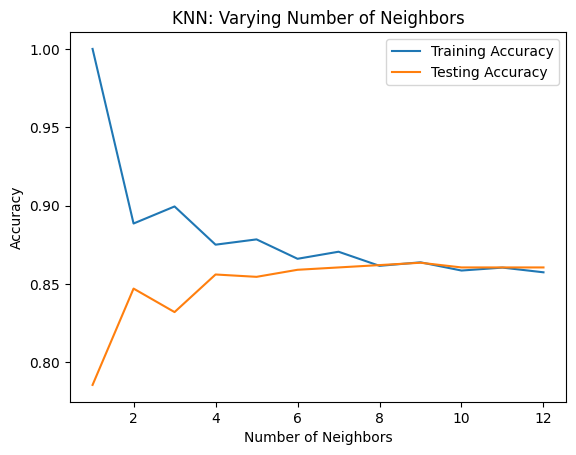

In [17]:
# 1. Test against over and under fitting
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
#print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# 2. and visualize that
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
#plt.show()

## 2. Regression

### Regression intro

Regression tasks' target value (a.k.a `y`) is usually a prediction of the model, comprised continous values (e.g . GDP, a price, etc).

A simple example of a regression algorithm is linear regression, where we create a function to fit the data points. This function is the trained model that can be used to predict.

A simple example:

[ 6566.23  9237.76 15886.45 ... 19800.07 17534.64 15966.69]


Text(0, 0.5, 'Sales ($)')

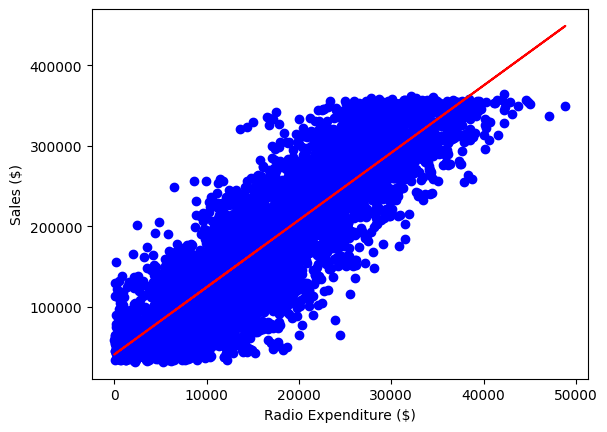

In [23]:
# 1. importing and cleaning the data
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## 1. importing and cleaning the data
# read the csv file 
sales_df = pd.read_csv('./data/Advertising_sales.csv')
# Create X from the radio column's values
X = sales_df['radio'].values
print(X)

# Create y from the sales column's values
y = sales_df['sales'].values
# Reshape X, since scikit needs the features np array to be of shape (n,1)
X = X.reshape(-1,1)

# Check the shape of the features and targets
#print(X.shape, y.shape)

## 2. Create, train the model and make predictions
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

## 3. plot the relationship

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions , color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
#plt.show()

### Inner workings of linear regression

In it's simplest example which uses 1 feature, we use the following formula to create the line that fits the data points:

$$ y = ax + b $$

or in it's ML variation:

$$ \hat{y} = wx + b$$

Where: 
1. $y$ or $\hat{y}$: target value.
2. $x$: single feature.
3. $w$ or $a$: weights of the model in in simple linear regression , or y intercept in linear regression.
4. $b$: bias or slope in linear regression.

**How do we choose $a$ and $b$?**

We define an _error/loss/cost function_ for our linear regression line, and then choose another function the line that minimizes that error function.

The loss function of linear regression is called _Residual Sum of Squares (RSS)_, and one of the functions that minimizes the error for it is called _Ordinary Least Squared (OLS)_.

**Let's do it for multiple features**

It's the same function, but for every feature.

$$ \hat{y} = \sum_{n=1}^N w_{n}x_{n} + b $$

**And how do we QA the model?**

For linear regression we use:
1. R-squared to quanitfy find how much a feature impacted the target variable y.
2. Root Mean Squared error to find the mean error, in the units of the of the target variable y.

An example of multiple linear regression:

In [37]:
## 1. Train and make predictions for the model
# Create X and y arrays
X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

## 2. Evaluate the model
# Import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(
    y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]
R^2: 0.9990152104759368
RMSE: 8669686.866907274


### Cross Validation


Used to evaluate a model's quality after training.

Solves for the issue, that the quality evaluations made before, aren't the best since they're only comprised of 2 sets: the train and test data.

To solve for this we can use Cross validation, which evaluates the models quality separating the dataset into k groups, training and testing the results for all iterations or epochs of the training. In more detail the process for 1 iteration with 5 folds is: Separate into 2 groups, fold 1 to train, and folds 2-k to test.

An example:

In [42]:
## 1. do cross validation
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_results)

## 2. analyze the results
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99901056 0.99900065 0.99893247 0.99898603 0.99903339]
0.9989926202782721
3.3793478896890154e-05
[0.99893783 0.99903111]


### Regularization

**Why regularize?**

We have loss functions to calculate coefficients (parameters or weights). In linear regression, it's $a$ and $b$. With large coefficients we run the risk of overfitting, so we alter the loss function to penalize large coefficients. Not if we use regularization.

Some methods are:

**Ridge regression**

OLS function + 

$$ \alpha + \sum_{i=1}^N a_{i}^2 $$

Ridge penalizes large coefficients.

$\alpha$ is a _hyperparameter_, these which helps tune the models parameters. High alpha means a large coefficient and a risk of overfitting, same for low alpha values.

**Lasso Regression**

OLS function +

$$ \alpha * \sum_{i=1}^N \lvert a_{i} \rvert \ $$

Lasso regression is used to asses feature importance, since it shrinks less important features to 0.

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]
[ 3.56256962 -0.00397035  0.00496385]


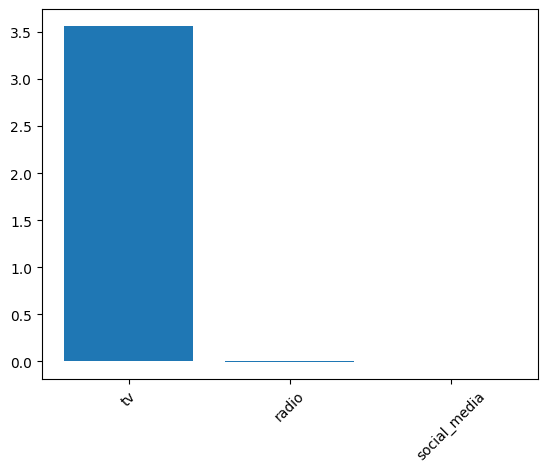

In [47]:
## 1. Ridge regression
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)
# Conclusions: The scores don't appear to change much as alpha increases,
# which is indicative of how well the features explain the variance in the target—even
# by heavily penalizing large coefficients, underfitting does not occur!

## 2. Lasso regression
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)

sales_columns = sales_df.drop(["sales", "influencer"], axis=1).columns
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Conclusions: the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values!

## 3. Fine tuning the model

### How good is your clasification model?

So far, we've been mostly scoring our model based on accuracy **for classification problems**. However, if the number of observations in 1 class is larger than the other, accuracy may be biased so we need to find another way to interpret this. This is where a _confusion matrix_ comes in.

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It compares the actual target values with those predicted by the model. The matrix has four main components:

- True Positive (TP): The number of correct positive predictions.
- True Negative (TN): The number of correct negative predictions.
- False Positive (FP): The number of incorrect positive predictions.
- False Negative (FN): The number of incorrect negative predictions.


|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive| TP                 | FN                 |
| Actual Negative| FP                 | TN                 |






Let's consider a binary classification problem where we are predicting whether an email is spam or not. After running our model, we get the following results:

- 50 emails were correctly identified as spam (True Positive, TP).
- 10 emails were incorrectly identified as spam (False Positive, FP).
- 5 emails were incorrectly identified as not spam (False Negative, FN).
- 100 emails were correctly identified as not spam (True Negative, TN).

The confusion matrix for this example would look like this:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive| 50 (TP)            | 5 (FN)             |
| Actual Negative| 10 (FP)            | 100 (TN)           |

Explanation:

- **True Positive (TP)**: 50 emails were correctly identified as spam.
- **False Positive (FP)**: 10 emails were incorrectly identified as spam.
- **False Negative (FN)**: 5 emails were incorrectly identified as not spam.
- **True Negative (TN)**: 100 emails were correctly identified as not spam.

**Accuracy**

Accuracy measures the overall correctness of the model. It is the ratio of correctly predicted observations to the total observations.

Formula:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

Importance:
Accuracy is a good measure when the classes are balanced. However, it can be misleading if the classes are imbalanced.

**Precision**

Precision (also called Positive Predictive Value) measures the accuracy of the positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives.

Formula:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

Importance:
Precision is important when the cost of false positives is high. For example, in spam detection, a high precision means fewer legitimate emails are marked as spam.

**Recall**

Recall (also called Sensitivity or True Positive Rate) measures the ability of the model to identify all relevant instances. It is the ratio of correctly predicted positive observations to all the observations in the actual class.

Formula:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

Importance:
Recall is important when the cost of false negatives is high. For example, in medical diagnosis, a high recall means fewer actual cases are missed.

**F1 Score**

F1 Score is the harmonic mean of precision and recall. It provides a single metric that balances both concerns.

Formula:
$$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

Importance:
The F1 Score is useful when you need a balance between precision and recall. It is especially helpful when the class distribution is imbalanced.

In [68]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# read the csv file
diabetes_df = pd.read_csv('./data/Diabetes_clean.csv')
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[172  29]
 [ 77  30]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       201
           1       0.51      0.28      0.36       107

    accuracy                           0.66       308
   macro avg       0.60      0.57      0.56       308
weighted avg       0.63      0.66      0.62       308



### Logistic regression and the ROC curve

**Logistic regression**
Used for classification.

Calculates the probablility that an observation belongs to a binary class. Usually if the threshold $p > 0.5$, we label te data as 1, and if $p < 0.5$, we label the data as 0.

**ROC (Receiver Operating Characteristic) Curve**

Helps to visualize how different logistic regressions affect true positive and false positive rates.

A ROC curve above the dotted line means it predicts better than guessing randomly.

To quantify the model based on the ROC plot, we use the AUC, which measures the area under the curve of the plot, values ranging from 0 to 1.

A perfect model has a TP p of 1, and a FP p of 0.




LogisticRegression()
[0.12157641 0.34350122 0.22622522 0.10042248 0.75908481]


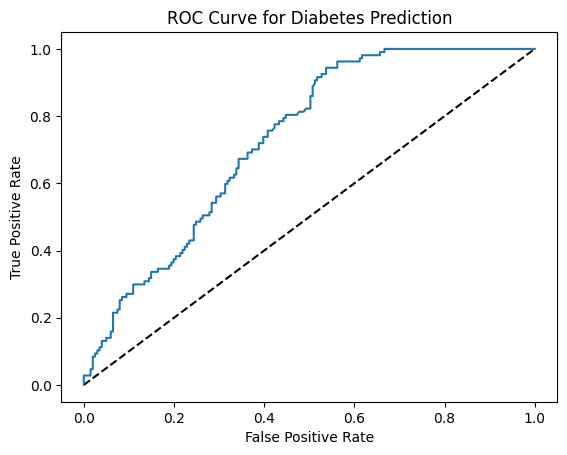

0.7298553959176082
[[172  29]
 [ 77  30]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       201
           1       0.51      0.28      0.36       107

    accuracy                           0.66       308
   macro avg       0.60      0.57      0.56       308
weighted avg       0.63      0.66      0.62       308



In [75]:
# read the csv file
diabetes_df = pd.read_csv('./data/Diabetes_clean.csv')
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


## 1. get predictions of target variable probabilities
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

print(logreg)
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:5])

## 2. plot the roc curve
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

## 3. Calculate the ROC AUC
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

### Hyperparameters tuning

Hyperparameters are parameters we specify before fitting a model. E.g $k$ in KNN and $\alpha$ in ridge and lasso regression.

**Hyperparameter tuning** is the process of finding the best hyperparameter values by trial and error. 
Always do cross-validation and withhold the train test for final evaluation.

2 used methods are **Grid search cross validation** and **Randomized Search cross validation**.

Both use a table to keep track of the success metric aginast the various hyperameter values tested. One is randomized and one is exhaustive.

|                | value              | Metric             |
|----------------|--------------------|--------------------|
| alpha          | 0.1                | 0.6523             |
| alpha          | 1                  | 0.4534             |
| alpha          | 10                 | 0.6834             |

**GridSearchCV**

GridSearchCV is an exhaustive search over specified parameter values for an estimator. It evaluates all possible combinations of hyperparameters and selects the best one based on cross-validation performance. It's computationally expensive.

**RandomizedSearchCV**

RandomizedSearchCV is a randomized search over specified parameter values for an estimator. It samples a fixed number of parameter settings from the specified distributions and evaluates them using cross-validation.

**Conclustion**
Both GridSearchCV and RandomizedSearchCV are powerful tools for hyperparameter tuning, helping to improve model performance by finding the optimal set of parameters. `

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.linear_model import Lasso, LogisticRegression
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv('./data/Diabetes_clean.csv')
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
lasso = Lasso()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## 1. Do Grid search cross validation

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score (R-squared): {}".format(lasso_cv.best_score_))

## 2. Do Randomized Search cross validation
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

logreg = LogisticRegression()
# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params , cv=kf, n_iter=1)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned lasso paramaters: {'alpha': np.float64(0.05264105263157895)}
Tuned lasso score (R-squared): 0.2651011761660329
Tuned Logistic Regression Parameters: {'tol': np.float64(0.2041612244897959), 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': np.float64(0.7979591836734694)}
Tuned Logistic Regression Best Accuracy Score: 0.6465280554444888


## 4. Preprocessing and pipelines

### Preprocessing data

So far we've been working with clean data (numerica data and no missing values).

The step for cleaning the data is called **preprocessing**.

**Categorical features**

In the diabetes example, 0 meant no diabetes, and 1 the presence of it. Sometimes data will be more complex, for example genres of music.

We create dummy variables for this kind of categorical features.

Below is a table representing 10 genres of music with dummy variables. Each genre is represented by a binary variable (0 or 1).

| Rock | Pop | Jazz | Classical | Hip-Hop | Country | Electronic | Reggae | Blues | Metal |
|------|-----|------|-----------|---------|---------|------------|--------|-------|-------|
| 1    | 0   | 0    | 0         | 0       | 0       | 0          | 0      | 0     | 0     |
| 0    | 1   | 0    | 0         | 0       | 0       | 0          | 0      | 0     | 0     |
| 0    | 0   | 1    | 0         | 0       | 0       | 0          | 0      | 0     | 0     |
| 0    | 0   | 0    | 1         | 0       | 0       | 0          | 0      | 0     | 0     |
| 0    | 0   | 0    | 0         | 1       | 0       | 0          | 0      | 0     | 0     |
| 0    | 0   | 0    | 0         | 0       | 1       | 0          | 0      | 0     | 0     |
| 0    | 0   | 0    | 0         | 0       | 0       | 1          | 0      | 0     | 0     |
| 0    | 0   | 0    | 0         | 0       | 0       | 0          | 1      | 0     | 0     |
| 0    | 0   | 0    | 0         | 0       | 0       | 0          | 0      | 1     | 0     |
| 0    | 0   | 0    | 0         | 0       | 0       | 0          | 0      | 0     | 1     |

Explanation:

- Each row represents a unique genre of music.
- Each column represents a dummy variable for a specific genre.
- A value of 1 indicates the presence of the genre, while a value of 0 indicates its absence.

Important: We can drop the last column, in order to not duplicate information


In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score

music_df = pd.read_csv('./data/Music_clean.csv')

# Create music_dummies
genre_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_df_2.shape))

# Create X and y
X = music_dummies.drop('popularity', axis=1)
y = music_dummies['popularity']

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-(scores))
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

#An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity),
# suggesting the model is reasonably accurate.

Shape of music_dummies: (1000, 13)
Average RMSE: 10.03309869053936
Standard Deviation of the target array: 14.02156909907019


### Handling missing data

We need to fill in missing values or values with bad data (NaN, null, etc).

A common approach is to remove missing values, equaling <= 5% of the entries.

Another option is to impute missing data -- do an educated guess. Mean, most frequent values and other methods are used.

**Pipelines**

Imputing is a type of transformation. We can group together several transofmration in a pipeline.

In [54]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[80 20]
 [27 27]]


### Centering and scaling

Center and scaling are 2 more pre-processing imputation techinques.


If some features are on far larger or smaller scales than others, it can be problematic to modelslike kNN, since it explicitly measures the distance between points (euclidian distance) for predictions, so scaling is important.

3 useful methods to know:

1. Standardization: Substract the mean and divide by variance. All resulting features are centered around 0 and have a variance of 1.
2. Standardization variant: Substract by the minimum and divide by range. All resulting features are between the range of 0 and 1.
3. Normalization: Results in features between the ranges of -1 and 1.

Standardization is useful for when the dataset follows a normal/gaussian distribution. Normalization is useful for when it doesn't.



In [69]:
## 1. For regression
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

music_df = pd.read_csv('./data/Music_clean.csv')

X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))
#The model may have only produced an R-squared of 0.619, but without scaling this exact model would have only produced a score of 0.35,
#which proves just how powerful scaling can be!

## 2. For classification
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

X_2 = music_df.drop("genre", axis=1).values
y_2 = music_df["genre"].values
# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.637978958680416
0.9275 
 {'logreg__C': np.float64(0.5267894736842105)}
